In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
data = pd.read_csv('OnlineRetail.csv', encoding= 'latin1')

data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Monthly Revenue

In [28]:
# print(type(data['InvoiceDate'][0]))

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])


data['m/y'] = data['InvoiceDate'].map(lambda date: f'{date.month}/{date.year}')
data['Revenue'] = data['UnitPrice'] * data['Quantity']
# print(data.iloc[0])
tx_revenue = data.groupby('m/y', sort= False)['Revenue'].sum().reset_index()

### How groupby() works
df.groupby('a column') --> returns DataFrameGroupby object  
this pic helps visualizing the groups based on the column Team

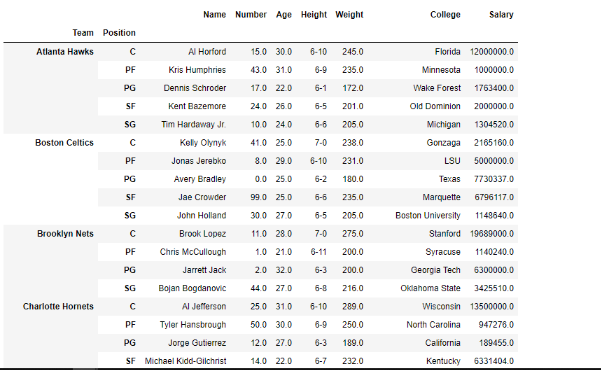  

gk = df.groupby('a column')  
gk.func() --> if there is one column it applies the func on the column and attaches the result to the group index. func examples include sum(), mean(), max(), first(), etc.  
and if there are multiple columns we must choose the columns we want the function to work on:    

gk['column'].func()  

the above line returns a Series with the group index as index and the modified column (modified according to func) as the actual data.  

se = gk['column'].func()  
df = se.reset_index()  

now if we apply the reset_index function on the series like above, it will convert the group indexes to an actual data column and therefore Series will convert to a DataFrame. and also make arbitrary indexes (0 to n).  
now back to the main thing.

In [29]:
tx_revenue

,m/y,Revenue
0,12/2010,748957.020
1,1/2011,560000.260
2,2/2011,498062.650
3,3/2011,683267.080
4,4/2011,493207.121
5,5/2011,723333.510
6,6/2011,691123.120
7,7/2011,681300.111
8,8/2011,682680.510
9,9/2011,1019687.622


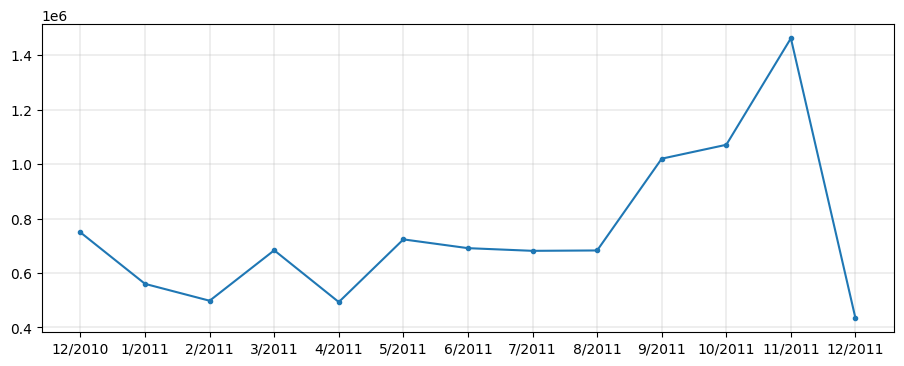

In [30]:
plt.figure(figsize=(11,4))
plt.plot(tx_revenue['m/y'], tx_revenue['Revenue'], marker='o', markersize= 3)
plt.grid(linewidth= .3)

## Monthly Revenue Growth

In [31]:
tx_revenue['MonthlyGrowth'] = tx_revenue['Revenue'].pct_change()

tx_revenue

,m/y,Revenue,MonthlyGrowth
0,12/2010,748957.020,NaN
1,1/2011,560000.260,-0.252293
2,2/2011,498062.650,-0.110603
3,3/2011,683267.080,0.371850
4,4/2011,493207.121,-0.278163
5,5/2011,723333.510,0.466592
6,6/2011,691123.120,-0.044530
7,7/2011,681300.111,-0.014213
8,8/2011,682680.510,0.002026
9,9/2011,1019687.622,0.493653


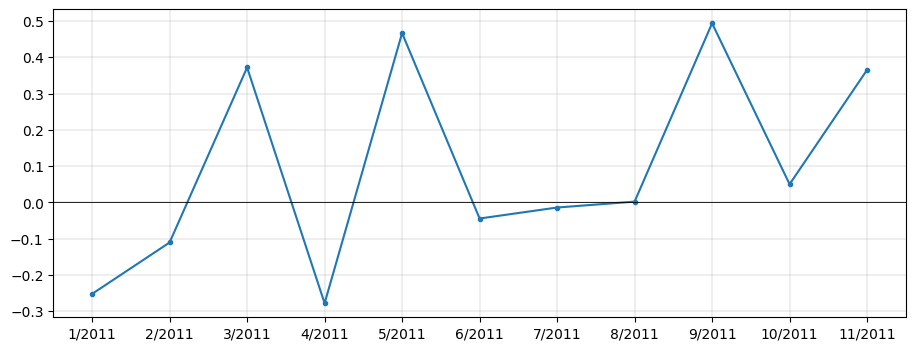

In [32]:
complete_data = tx_revenue[tx_revenue.index < 12]

plt.figure(figsize=(11,4))
plt.plot(complete_data['m/y'], complete_data['MonthlyGrowth'], marker='o', markersize= 3)
plt.axhline(color='black', linewidth=.6)
plt.grid(linewidth= .3)

## Monthly Active Customers

In [33]:
tx_monthly_active = data.groupby('m/y', sort=False)['CustomerID'].nunique().reset_index()
tx_monthly_active.head(5)

,m/y,CustomerID
0,12/2010,948
1,1/2011,783
2,2/2011,798
3,3/2011,1020
4,4/2011,899


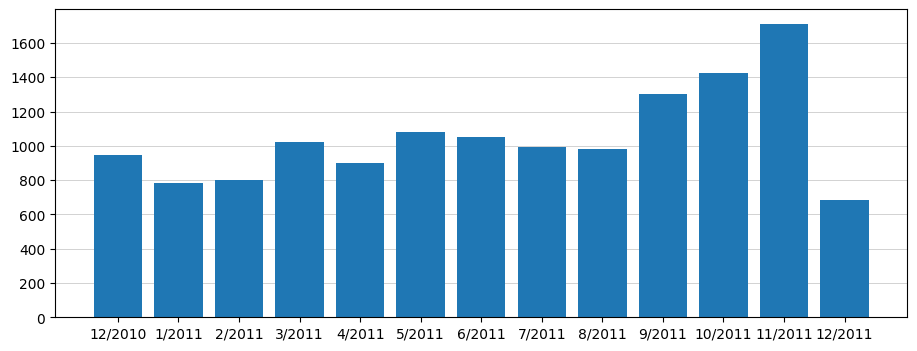

In [34]:
plt.figure(figsize=(11,4))
plt.bar(tx_monthly_active['m/y'], tx_monthly_active['CustomerID'], zorder=2)
plt.grid(axis='y', linewidth= .4)

## Monthly number of items purchased

In [35]:
tx_monthly_sales = data.groupby('m/y', sort=False)['Quantity'].sum().reset_index()
tx_monthly_sales.head(5)

,m/y,Quantity
0,12/2010,342228
1,1/2011,308966
2,2/2011,277989
3,3/2011,351872
4,4/2011,289098


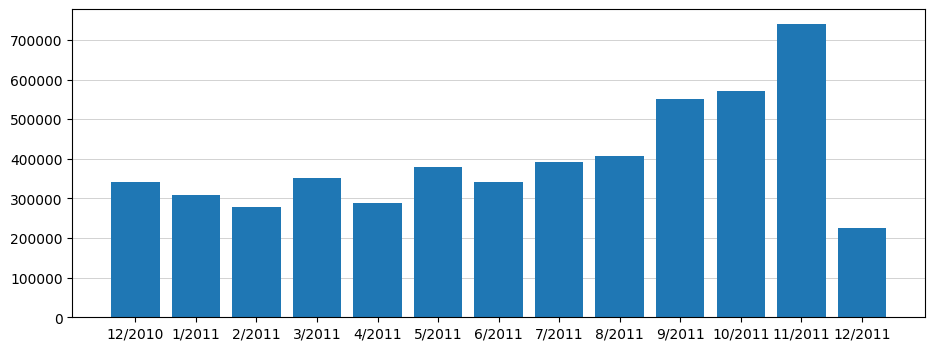

In [36]:
plt.figure(figsize=(11,4))
plt.bar(tx_monthly_sales['m/y'], tx_monthly_sales['Quantity'], zorder=2)
plt.grid(axis='y', linewidth= .4)

## Average revenue per order

In [37]:
tx_monthly_order_avg = data.groupby('m/y', sort=False)['Revenue'].mean().reset_index()
tx_monthly_order_avg.head(5)

,m/y,Revenue
0,12/2010,17.630400
1,1/2011,15.933088
2,2/2011,17.976058
3,3/2011,18.593313
4,4/2011,16.486399


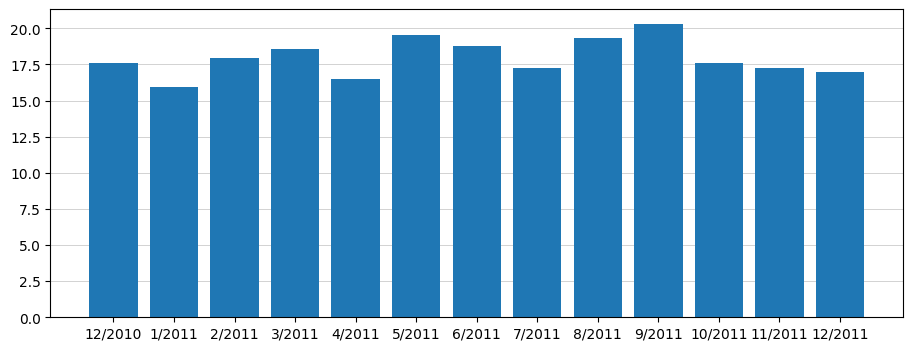

In [38]:
plt.figure(figsize=(11,4))
plt.bar(tx_monthly_order_avg['m/y'], tx_monthly_order_avg['Revenue'], zorder=2)
plt.grid(axis='y', linewidth= .4)

## New customers' revenue

In [39]:
# data['hh'] = data['InvoiceDate'].map(lambda date: 100*date.year + date.month)

tx_min_purchase = data.groupby('CustomerID', sort=False).InvoiceDate.min().reset_index()
tx_min_purchase.columns = ['CustomerID','MinPurchaseDate']
tx_min_purchase['first_m/y'] = tx_min_purchase['MinPurchaseDate'].map(lambda date: f'{date.month}/{date.year}')
# tx_min_purchase['first_m/y'] = tx_min_purchase['MinPurchaseDate'].map(lambda date: 100*date.year + date.month)


data = pd.merge(data, tx_min_purchase, on='CustomerID', how='left')

data['UserType'] = 'New'
data.loc[data['m/y']!=data['first_m/y'],'UserType'] = 'Existing'

tx_user_type_revenue = data.groupby(['m/y','UserType'], sort=False)['Revenue'].sum().reset_index()
# tx_user_type_revenue = tx_user_type_revenue.query("m/y != 12/2010 and m/y != 12/2011")
tx_user_type_revenue = tx_user_type_revenue.loc[(tx_user_type_revenue['m/y'] != '12/2010') & (tx_user_type_revenue['m/y'] != '12/2011')]
# tx_user_type_revenue.index -= 2
tx_user_type_revenue

,m/y,UserType,Revenue
2,1/2011,New,203457.860
3,1/2011,Existing,356542.400
4,2/2011,Existing,348541.270
5,2/2011,New,149521.380
6,3/2011,New,189930.080
7,3/2011,Existing,493337.000
8,4/2011,Existing,373442.870
9,4/2011,New,119764.251
10,5/2011,Existing,607474.770
11,5/2011,New,115858.740


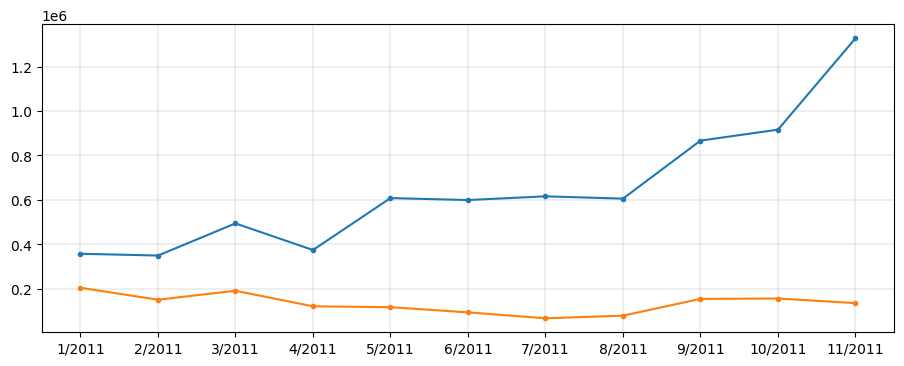

In [40]:
plt.figure(figsize=(11,4))
plt.plot(tx_user_type_revenue.loc[tx_user_type_revenue['UserType'] == 'Existing']['m/y'], tx_user_type_revenue.loc[tx_user_type_revenue['UserType'] == 'Existing']['Revenue'], marker='o', markersize= 3)
plt.plot(tx_user_type_revenue.loc[tx_user_type_revenue['UserType'] == 'New']['m/y'], tx_user_type_revenue.loc[tx_user_type_revenue['UserType'] == 'New']['Revenue'], marker='o', markersize= 3)
plt.grid(linewidth= .3)

## New Customer ratio

In [41]:
tx_user_ratio = data.query("UserType == 'New'").groupby(['m/y'], sort=False)['CustomerID'].nunique()/data.query("UserType == 'Existing'").groupby(['m/y'], sort=False)['CustomerID'].nunique() 
tx_user_ratio = tx_user_ratio.reset_index()
tx_user_ratio = tx_user_ratio.dropna()
tx_user_ratio

,m/y,CustomerID
0,12/2010,inf
1,1/2011,1.162983
2,2/2011,0.909091
3,3/2011,0.758621
4,4/2011,0.498333
5,5/2011,0.348750
6,6/2011,0.287990
7,7/2011,0.238155
8,8/2011,0.205412
9,9/2011,0.296813


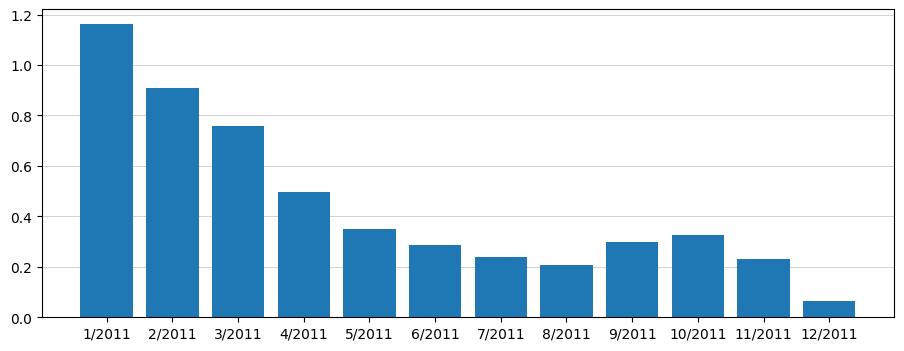

In [42]:
plt.figure(figsize=(11,4))

plt.bar(tx_user_ratio['m/y'], tx_user_ratio['CustomerID'], zorder=2)
plt.grid(axis='y', linewidth= .4)

## Customers active or passive in each month

In [43]:
tx_user_purchase = data.groupby(['CustomerID','m/y'],sort=False )['Revenue'].sum().reset_index()
# tx_user_purchase.head(10)
tx_retention = pd.crosstab(tx_user_purchase['CustomerID'], tx_user_purchase['m/y']).reset_index()
tx_retention = tx_retention[['CustomerID', '12/2010', '1/2011', '2/2011', '3/2011', '4/2011', '5/2011', '6/2011', '7/2011', '8/2011', '9/2011', '10/2011', '11/2011', '12/2011']]
tx_retention.head()

m/y,CustomerID,12/2010,1/2011,2/2011,3/2011,4/2011,5/2011,6/2011,7/2011,8/2011,9/2011,10/2011,11/2011,12/2011
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12347.0,1,1,0,0,1,0,1,0,1,0,1,0,1
2,12348.0,1,1,0,0,1,0,0,0,0,1,0,0,0
3,12349.0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,12350.0,0,0,1,0,0,0,0,0,0,0,0,0,0


## Monthly Retention Rate

In [44]:
months = tx_retention.columns[2:]
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['m/y'] = selected_month
    retention_data['TotalUserCount'] = tx_retention[selected_month].sum()
    retention_data['RetainedUserCount'] = tx_retention[(tx_retention[selected_month]>0) & (tx_retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)
    
tx_retention = pd.DataFrame(retention_array)
tx_retention['RetentionRate'] = tx_retention['RetainedUserCount']/tx_retention['TotalUserCount']
tx_retention

,m/y,TotalUserCount,RetainedUserCount,RetentionRate
0,2/2011,798,299,0.374687
1,3/2011,1020,345,0.338235
2,4/2011,899,346,0.384872
3,5/2011,1079,399,0.369787
4,6/2011,1051,464,0.441484
5,7/2011,993,415,0.417925
6,8/2011,980,433,0.441837
7,9/2011,1302,465,0.357143
8,10/2011,1425,552,0.387368
9,11/2011,1711,690,0.403273


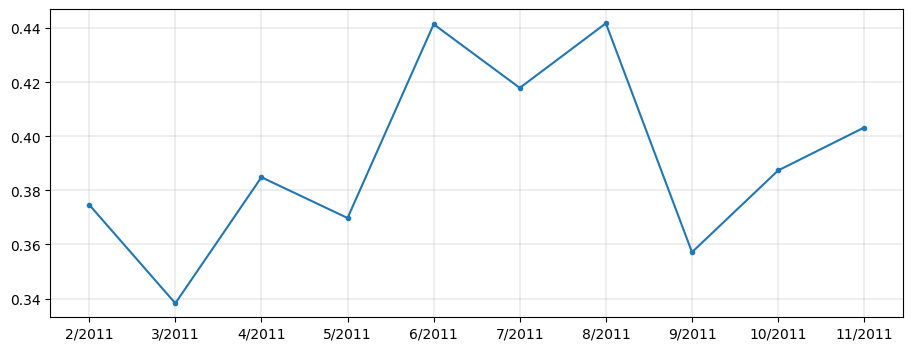

In [45]:
tx_retention = tx_retention[tx_retention.index < 10]

plt.figure(figsize=(11,4))
plt.plot(tx_retention['m/y'], tx_retention['RetentionRate'], marker='o', markersize= 3)
plt.grid(linewidth= .3)